# Departamento de Engenharia de Teleinformática

# Computação Numérica / Métodos Numéricos

# Tarcisio Ferreira Maciel, Dr.-Ing. (Professor: [maciel@ufc.br](mailto:maciel@ufc.br))

# Darlan Cavalcante Moreira, M.Sc. (Colaborador: [darlan@gtel.ufc.br](mailto:darlan@gtel.ufc.br))

## Identificação do aluno

Nome: Ariel da Silva Barros

Matrícula: 374918

## Instruções

As questões abaixo devem ser resolvidas aqui mesmo no **Jupyter Notebook** e podem envolver tanto soluções escritas em markdown (veja sintaxe para markdown [aqui](https://daringfireball.net/projects/markdown/basics)), como soluções em código. A questão 0 abaixo serve de exemplo de como as questões devem ser resolvidas.

<div class="alert alert-warning">
**Dica:** em células markdown vocês podem usar dois espaços para criar uma quebra de linha.
</div>

## Questão 0

Para entender como as questões devem ser resolvidas, faça:

1. Em que país estamos?
2. Implemente uma função que retorne o dobro da entrada


## Solução de 0

<!-- Não apague o div -->
<div class="solucao alert alert-success">

Estamos no Brasil.

<!-- Não apague o div -->
</div>

In [ ]:
# Solução de 2: Implementação em python
def dobro(x):
    return 2 * x

----

## Questão 1
Escreva um programa em C/C++11 e uma **função** equivalente em Python 3.X que leia um número de ponto flutuante de 32 ou 64 bits e que imprima esse os bits desse número no formato IEEE-754 $b_S|b_1 b_2 \ldots b_E|b_1 b_2 \ldots b_M$ onde (S, E, M) é igual a (1, 8, 23) para precisão simples e (1, 11, 52) para precisão dupla. Note que nesta questão é suficiente imprimir a forma binária do número não sendo necessário implementar o processo de normalização.

## Solução em C/C++11:

Edite e coloque o código na célula Markdown abaixo.

```C++
#include <iostream>

int main(int argc, char *argv[]) {
    // O código de sua solução deve vir aqui.
    return 0;
}
```

## Solução em Python 3.X:

In [23]:
import struct as st
import numpy as np

def Binario32(numero):
    # Objeto empacotado com o formato 'f' float IEEE 754 32 bits com 4 bytes
    # depois o objeto em float é transformado para formato inteiro 'I' com 4 bytes. 
    # É Necessário que os dois parametros da função unpack sejam objetos de mesmo tamanho (4 bytes nesse caso)
    valorEmInteiro = st.unpack('I', st.pack('f', numero))[0]
    return str(bin(valorEmInteiro))[2:]

def Binario64(numero):
    # Objeto empacotada com o formato 'd' double IEEE 754 64 bits com 8 bytes
    # depois o objeto em double é transformado para formato inteiro 'Q' com 8 bytes.
    # É Necessário que os dois parametros da função unpack sejam objetos de mesmo tamanho (8 bytes nesse caso)
    valorEmInteiro = st.unpack('Q', st.pack('d', numero) )[0]
    return str(bin(valorEmInteiro))[2:]

# Exemplo: converter o número -5.565465.
print('Valor binário em IEEE 754 - 32 bits: {}'.format(Binario32(-5.565465))) 
print('Valor binário em IEEE 754 - 64 bits: {}'.format(Binario64(-5.565465)))

Valor binário em IEEE 754 - 32 bits: 11000000101100100001100001001010
Valor binário em IEEE 754 - 64 bits: 1100000000010110010000110000100101000001110010000010000101101100


## Questão 2
Escreva uma **função** programa em Python 3.X que  **implemente** o processo de normalização para converter um número de ponto flutuante de 32 ou 64 bits para sua forma binária no padrão IEEE-754.

In [26]:
import numpy as np

def dec2bin(x): # função para converter um número INTEIRO decimal para binário.
    return bin(x)[2:] 

def normalization(number):
    number32 = np.float32(number) # casting para precisão simples.
    
    if number > 0: # seta o bit de sinal.
        sinal = 0 # caso número for positivo
    else:
        sinal = 1 # caso número for negativo
        
    expoent = 0
    normalizado = number
           
    # Normalização para 32 e expoente para 32 e 64 bits
    normalizado32 = number32
    if abs(number32) < 1 and abs(number32) > 0: # para números com módulo entre 0 e 1 cujo os expoentes de 2 são negativos
        while abs(normalizado32) < 1:
            normalizado32 = normalizado32 * 2 # fazer multiplicações sucessivar até a mantissa assumir valor de  1,ddd...
            expoent -= 1 # Ao fim do while obtemos o expoente.
    else:
        while abs(normalizado32) > 2: # para números quem podem ser divididos com expoente positivo.
            normalizado32 = normalizado32 / 2 # fazer divisões sucessivas até a mantissa assumir valor de 1,ddd...
            expoent += 1 # Ao fim do while obtemos o expoente.
       
    # Normalização para 64 bits
    normalizado64 = number
    if abs(number) < 1 and abs(number) > 0: # para números com módulo entre 0 e 1 cujo os expoentes de 2 são negativos
        while abs(normalizado64) < 1:
            normalizado64 = normalizado64 * 2 # fazer multiplicações sucessivar até assumir valor de  1,ddd...
    else:
        while abs(normalizado64) > 2: # para números quem podem ser divididos com expoente positivo.
            normalizado64 = normalizado64 / 2 # fazer divisões sucessivas até assumir valor de 1,ddd...
            
    expoent32 = ''        
    expoent64 = ''
    # código abaixo usado para completar com zeros o restante de casas do expoente na representação do número.
    for i in range(0, 8 - len(dec2bin(expoent + 127))):
        expoent32 += str(0)
    for i in range(0, 11 - len(dec2bin(expoent + 1023))):
        expoent64 += str(0)
        
    expoent32 += dec2bin(expoent + 127) # expoente em binário com polarização.
    expoent64 += dec2bin(expoent + 1023) # expoente em binário com polarização.
    
    mantissa32 = abs(normalizado32) % 1 # pega somente o resto do número normalizado restando a mantissa na forma 0.ddd...
    mantissa64 = abs(normalizado64) % 1 # pega somente o resto do número normalizado restando a mantissa na forma 0.ddd...
    
    print("Sinal = {} | Expoente = {} | Mantissa32 = {} | Mantissa64 = {}".format(sinal, expoent, mantissa32, mantissa64))
    
    mantissaBinary32 = ''
    mantissaBinary64 = ''
    while mantissa32 != 1:
        # multiplica sempre a parte fracionária da mantissa a cada iteração.
        mantissa32 = mantissa32 % 1 * 2
        # concatena a parte inteira da mantissa atual que é 0 ou 1.
        mantissaBinary32 += str(int(mantissa32 - mantissa32 % 1))
        
    while mantissa64 != 1:
        # multiplica sempre a parte fracionária da mantissa a cada iteração.
        mantissa64 = mantissa64 % 1 * 2
        # concatena a parte inteira da mantissa atual que é 0 ou 1.
        mantissaBinary64 += str(int(mantissa64 - mantissa64 % 1))
        
    while len(mantissaBinary32) < 23: # se necessário completa o resto não usado da mantissa com zeros.
        mantissaBinary32 += str(0)
        
    while len(mantissaBinary64) < 52: # se necessário completa o resto não usado da mantissa com zeros.
        mantissaBinary64 += str(0)
        
    print("Representação binária de 32 bits: {}".format(str(sinal) +'|'+ expoent32 +'|'+ mantissaBinary32))
    print("Representação binária de 64 bits: {}".format(str(sinal) +'|'+ expoent64 +'|'+ mantissaBinary64))

normalization(56.4584) # Cuidado com overflow/underflow

Sinal = 0 | Expoente = 5 | Mantissa32 = 0.7643250226974487 | Mantissa64 = 0.7643249999999999
Representação binária de 32 bits: 0|10000100|11000011101010101100111
Representação binária de 64 bits: 0|10000000100|1100001110101010110011011001111010000011111001000010


## Questão 3
Utilizando o contéudo da seção 3.4.1 do livro *Métodos Numéricos para Engenharia, 5a. Ed.* de *Steven Chapra & Raymond Canale* faça:

1. Crie um conjunto de números hipotético em ponto flutuante para uma máquina que armazena informação usando palavras de 8 bits com (1, 3, 5) para (S, E, M). Considere que o expoente seja polarizado. Determine também o $\varepsilon$ da máquina.

2. Escreva uma **função** em Python 3.X que determine o epsilon de seu computador.

## Solução:

<!-- Não apague o div -->
<div class="solucao alert alert-success">

Escreva aqui sua solução de 1.
O menor número positivo que pode ser representado tem a seguinte configuração: <br/>
$0$ para o bit de sinal. <br/>Para um bias igual a $2^{k-1} - 1 = 3$ com $k = 3$ , logo o menor expoente é então -3 que polarizado é iqual a 0.<br/>
$1000$ para a mantissa. Logo,<br/>
$00001000 = +0.5 \times 2^{-3} = 0,0625$<br/>
E as próximos números são:<br/><br/>
$00001001 = (1 \times 2^{-1} + 0 \times 2^{-2} + 0 \times 2^{-3} + 1 \times 2^{-4}) \times 2^{-3} = 0.0703125_{10}$ <br/>
$00001010 = (1 \times 2^{-1} + 0 \times 2^{-2} + 1 \times 2^{-3} + 0 \times 2^{-4}) \times 2^{-3} = 0.078125_{10}$ <br/>
$00001011 = (1 \times 2^{-1} + 0 \times 2^{-2} + 1 \times 2^{-3} + 1 \times 2^{-4}) \times 2^{-3} = 0.0859375_{10}$ <br/>
$00001100 = (1 \times 2^{-1} + 0 \times 2^{-2} + 1 \times 2^{-3} + 1 \times 2^{-4}) \times 2^{-3} = 0.09375_{10}$ <br/>
$00001101 = (1 \times 2^{-1} + 0 \times 2^{-2} + 1 \times 2^{-3} + 1 \times 2^{-4}) \times 2^{-3} = 0.1015625_{10}$ <br/>
$00001110 = (1 \times 2^{-1} + 0 \times 2^{-2} + 1 \times 2^{-3} + 1 \times 2^{-4}) \times 2^{-3} = 0.109375_{10}$ <br/>
$00001111 = (1 \times 2^{-1} + 0 \times 2^{-2} + 1 \times 2^{-3} + 1 \times 2^{-4}) \times 2^{-3} = 0.1171875_{10}$ <br/>

Igualmente espaçados em $7.8125 \times 10^{-3}$<br/><br/>
O próximo número já é com expoente $-2$ que em binário no formato polarizado é $001$. A mantissa então volta a ser $1000$.
$00011000 = (1 \times 2^{-1} + 0 \times 2^{-2} + 0 \times 2^{-3} + 0 \times 2^{-4}) \times 2^{-2} = 0.125_{10}$ <br/>
O salto entre os dois números ainda continua sendo $7.8125 \times 10^{-3}$ porém para valores mais altos o salto passa a ser:<br/>
$0.125 - 0.140625 = 0.015625$ . E assim por diante, de acordo com o módulo do número.<br/><br/>
O maior número que pode ser representado é: $01111111 = 15_{10}$ <br/>
Assim o intervalo representável em módulo é: $[0,0625_{10},15_{10}]$ acima disso e abaixo é overflow e underflow, respectivamente.<br/><br/>
O $\epsilon$ da máquina é $\epsilon = b^{1-t} = 2^{1-4} = 0.125$
<!-- Não apague o div -->
</div>

In [25]:
# Implemente sua solução de 2 aqui acompanhada de um exemplo de uso.

def epsDeMaquina(eps, display):
    i = 0 # variável para registrar o número de iterações
    while 1 + eps != 1: # a condição de parada é achar um número tão pequeno que seja o limite para que o número 1 não mude.
        epsMenor = eps # o eps atual é armazenado até que que outro eps menor que ele seja testado.
        eps = eps / 2 # a cada iteração o eps é dividido por 2 de modo a reprensentar um número cada vez menor na mantissa.
        if display:
            print('iteração {0}: {1}'.format(i, eps))
        i+=1
    return epsMenor

epsDeMaquina(1,False) # chamada da função com o eps inicial igual a 1

2.220446049250313e-16

## Questão 4
Escreva funções em Python 3.X que calculem $e^{-5}$ usando

1. $e^{-x} = 1 - x + \dfrac{x^2}{2!} - \dfrac{x^2}{3!} + \ldots $,
2. $e^{-x} = \dfrac{1}{e^x} = \dfrac{1}{1 + x + \dfrac{x^2}{2!} + \dfrac{x^2}{3!} + \ldots} $,

e compare com o valor exato. Considere os $N$ (fornecido como parâmetro) primeiros termos e apresente o erro relativo absoluto para cada termo que for adicionado.

In [ ]:
import numpy as np

se = np.exp(-5) # Se = 0.006737946999085467 - Solução exata

def erroRelativoAbsoluto(y):
    return abs( (se - y) / se )
    
def f(x,N): # Usando a primeira expansão. 
    y = 0
    for n in range(0,N): # para ir iterando os termos da série.
        y += (-x) ** n / np.math.factorial(n) # cálculo de cada termo
        print("{} termo(s) Erro = {}".format(n+1, erroRelativoAbsoluto(y)))
    return y

def g(x,N): # Usando a segunda expansão.
    y = 0
    for n in range(0,N): # para ir iterando os termos da série.
        y += x ** n / np.math.factorial(n)
        print("{} termo(s) Erro = {}".format(n+1, erroRelativoAbsoluto(1/y)))
    return 1 / y

print("resultado para a expansão 1: ", f(5,20))
print("resultado para a expansão 2: ", g(5,20))

## Questão 5
Calcule o polinômio $p(x) = x^3 - 7x^2 + 8x - 0,35 $ em $ x = 1,37 $. Use aritmética com 3 algarismos significativos e  e **truncamento**. Calcule o erro relativo absoluto comparado ao valor exato de $p(x)$. Repita o processo considerando $p(x)$ expresso como $p(x) = ((x - 7)x + 8)x - 0,35$. Apresente sua solução em texto e em Python 3.X.

## Solução:

<!-- Não apague o div -->
<div class="solucao alert alert-success">

Calculando $p(x)$ com 3 algarismos em todos os passos tem-se: <br/> <br/>
$p(1,37) = (1,37)^3 - 7(1,37)^2 + 8(1,37) - 0.35$ <br/>
$p(1,37) = 2,57 - 13,1 + 10,9 - 0,35 $ <br/>
$p(1,37) = -10,5 + 10,9 - 0,35$ <br/>
$p(1,37) = 0.05$ <br/> <br/>

Calculando com toda a precisão da calculadora: <br/> 
$p(1,37) = (1,37)^3 - 7(1,37) ^2 + 8(1,37) - 0.35$ <br/>
$p(1,37) = 0,043053$ <br/> <br/>

Logo, o erro relativo absoluto é: <br/>
$E_{Abs} = \left| \dfrac{S_{Exata} - S_{Num} }{S_{Exata}} \right|$ <br/><br/>
$E_{Abs} = \left| \dfrac{0,043053 - 0.05}{0,043053} \right| = 0.161359254$ <br/><br/>

Calculando a segunda definição $p(x)$ com 3 algarismos em todos os passos tem-se: <br/> <br/>
$p(1,37) = ((1,37 - 7)1,37 + 8)1,37 - 0,35$ <br/>
$p(1,37) = (-7,71 + 8)1,37 - 0,35$<br/>
$p(1,37) = 0,39 - 0,35 = 0.04$<br/><br/>

Calculando com toda a precisão da calculadora: <br/> 
$p(1,37) = ((1,37 - 7)1,37 + 8)1,37 - 0,35$ <br/>
$p(1,37) = 0,043053$

Logo, o erro relativo absoluto é: <br/>
$E_{Abs} = \left| \dfrac{S_{Exata} - S_{Num} }{S_{Exata}} \right|$ <br/><br/>
$E_{Abs} = \left| \dfrac{0,043053 - 0.04}{0,043053} \right| = 0.070912596$ <br/><br/>
<!-- Não apegue o div -->
</div>

In [53]:
from decimal import *
getcontext().prec = 3 # Usando 3 algarismos significativos.

# Usando a primeira definição de p(x) com 3 algarismos significativos.
def p(x):
    return Decimal(x) ** 3 - 7 * Decimal(x) ** 2 + 8 * Decimal(x) - Decimal(0.35)

# Usando a primeira definição de p(x) com toda a precisão do computador. 
def p2(x):
    return x ** 3 - 7 * x ** 2 + 8 * x - 0.35

# Usando a segunda definição de p(x) com 3 algarismos significativos.
def q(x):
    return ((Decimal(x) - 7) * Decimal(x) + 8) * Decimal(x) - Decimal(0.35)

# Usando a segunda definição de p(x) com toda a precisão do computador.
def q2(x):
    return ((x - 7) * x + 8) * x - 0.35

def erroRelativoAbsoluto(se,sn):
    return abs( (se - sn) / se)

print("Resultado da primeira definição de p(x) com 3 algarismos significativos: {}".format(p(1.37)))
print("Resultado da primeira definição de p(x) usando toda a precisão do computador: {}".format(p2(1.37)))
print("Erro Relativo Absoluto da primeira definição de p(x): {}".format(erroRelativoAbsoluto(p2(1.37) , float(p(1.37)))))
print("-------------------------------------------------------------------------------------------------")
print("Resultado da segunda definição de p(x) com 3 algarismos significativos: {}".format(q(1.37)))
print("Resultado da primeira definição de p(x) usando toda a precisão do computador: {}".format(q2(1.37)))
print("Erro Relativo Absoluto da segunda definição de p(x): {}".format(erroRelativoAbsoluto(q2(1.37) , float(q(1.37)))))


Resultado da primeira definição de p(x) com 3 algarismos significativos: 0.0500
Resultado da primeira definição de p(x) usando toda a precisão do computador: 0.04305300000000012
Erro Relativo Absoluto da primeira definição de p(x): 0.16135925487189892
-------------------------------------------------------------------------------------------------
Resultado da segunda definição de p(x) com 3 algarismos significativos: 0.0470
Resultado da primeira definição de p(x) usando toda a precisão do computador: 0.043052999999999064
Erro Relativo Absoluto da segunda definição de p(x): 0.09167769957961168


## Questão 6
Escreva um programa em Python 3.X para determinar o número de termos necessários para aproximar $ \cos(0,3\pi) $ a partir da sua expansão em série de MacLaurin até 8 algarismos significativos.

## Solução:

<!-- Não apague o div -->
<div class="solucao alert alert-success">

A série de MacLaurin nada mais é do que a série de taylor em torno de 0. Assumindo a série de maclaurin para o cos(x) pode ser generalizada da seguinte forma:
$$cos(x) = \sum\limits_{n = 1}^{\infty} \dfrac{(-1)^n \cdot x^{2n}}{(2n)!}$$
O que pode-se concluir da série de MacLaurin é que quanto maior o número de termos da série, menor é o erro da solução. O número de termos é obtido na implementação em python abaixo.

<!-- Não apague o div -->
</div>

In [60]:
import numpy as np

def cos2Laurin(x):
    sn, n = 0, 0
    se = np.cos(x) # 0.58778525229247314 Solução exata
    while abs(se - sn) > 10**(-8):
        sn += (-1)**n * x**(2*n) / np.math.factorial(2*n) # expansão em série de MacLaurin para cos(x)
        if False: # modifique para True para ver mais detalhes
            print("Usando {} termo(s). cos(x) = {}".format(n+1,sn))
        n += 1
    return n

print("São necessários {} termos para aproximar o valor com 8 algarismos significativos".format(cos2Laurin(0.3 * np.pi)))

São necessários 6 termos para aproximar o valor com 8 algarismos significativos


## Questão 7
A razão áurea pode ser definida como a razão que divide um segmento de tamanho $a + b$ de tal modo que a parte menor $a$ está para a parte maior $b$ na mesma proporção que a parte maior $b$ está para o todo $a + b$. Crie uma função ```Python GoldenSection(f, a, b, tol)``` em Python 3.X que implemente uma versão do método da bisseção que divida o intervalo segundo a razão áurea. Implemente também uma função ```Python Bissection(f, a, b, tol)``` que implemente o método da bisseção clássico e compare os dois métodos através de um exemplo de aplicação.

## Solução:

<!-- Não apague o div -->
<div class="solucao alert alert-success">

A razão áurea é dada portanto como $\dfrac{a+b}{b} = \dfrac{b}{a} = \phi$. Utilizaremos o $\phi$ na implementação em python abaixo$^{1}$. A constante $\phi$ é determinanda fazendo os seguintes passos:<br/>
$$\dfrac{b}{a} = \phi \rightarrow 
b = a\phi \rightarrow  
\dfrac{a + a\phi}{a\phi} = \dfrac{a\phi}{a} \rightarrow 
\dfrac{\phi + 1}{\phi} = \phi \rightarrow
\phi + 1 = \phi^2 \rightarrow
\phi^2 - \phi -1 = 0 $$ <br/>
Resolvendo a equação quadrática para $\phi$ (VER QUESTÃO 8). Assim, $\phi = 1.61803398875$ <br/>
Supondo que a solução esteja no intervalo $[x_1,x_2]$, e seguindo as mesmas definições que são exigidas no método da bissecção, pode-se reescrever os tamanhos a e b em função dos intervalos da seguinte forma. $x_{ns} = x_1 + a \rightarrow a = x_{ns} - x_1$ e $x_2 = X_{ns} + b \rightarrow b = x_2 - x_{ns}$. Substituindo em um dos lados da razão áurea tem-se: $\dfrac{b}{a} = \phi \rightarrow \dfrac{x_2 - x_{ns}}{x_{ns} - x_1} = \phi$. Portanto, 
$$x_{ns} = \dfrac{x_2+\phi x_1}{1 + \phi}$$ <br/>
Os mesmos valores de $x_{ns}$ podem ser obtidos substituindo em $\dfrac{a+b}{b} = \phi$ (EU TESTEI !).<br/>
1: Não sei se existe uma maneira melhor para implementar sem usar o valor de $\phi$.


<!-- Não apague o div -->
</div>

In [68]:
import numpy as np

def f(x):
    return x**2 - 0.90
    
def GoldenSection(f, a, b, tol):
    if f(a)*f(b) > 0:
        print("Não existe solução no intervalo dado")
    else:
        phi = 1.61803398875 # golden ratio, a constante é determinada na questão 8.
        xns = (b + phi*a) / (1 + phi);
        numIter = 0
        while abs(f(xns)) > tol:
            if False: # modifique para True para ver mais detalhes
                print("iteração: {} | a = {} | b = {} | xns = {} | f(xns) = {}".format(numIter, a, b, xns, f(xns)))
            if f(a)*f(xns) < 0:
                b = xns
            if f(xns)*f(b) < 0:
                a = xns
            xns = (b + phi*a) / (1 + phi);
            numIter += 1
        return xns, numIter

def Bissection(f, a, b, tol):
    if f(a)*f(b) > 0:
        print("Não existe solução no intervalo dado")
    else:
        xns = (a + b) / 2;
        numIter = 0
        while abs(f(xns)) > tol:
            if False: # modifique para True para ver mais detalhes
                print("iteração: {} | a = {} | b = {} | xns = {} | f(xns) = {}".format(numIter, a, b, xns, f(xns)))
            if f(a)*f(xns) < 0:
                b = xns
            if f(xns)*f(b) < 0:
                a = xns
            xns = (a + b) / 2;
            numIter += 1
        return xns, numIter

print("Usando Bissecção: {0} com {1} iterações".format(*Bissection(f,0.3,2.5,10**-6)))
print("Usando GoldenSection: {0} com {1} iterações".format(*GoldenSection(f,0.3,2.5,10**-6)))

Usando Bissecção: 0.9486833572387696 com 19 iterações
Usando GoldenSection: 0.9486838104431444 com 21 iterações


## Questão 8
A fim de atenuar a natureza frequentemente unilateral do método da falsa posição, implemente uma **função** em ```Python ModifiedRegulaFalsi(f, a, b, tol)``` em Python 3.X que divida por dois o valor de $f(x)$ no limite do intervalo que permanecer inalterado por três iterações consecutivas, substituindo assim a secante do método original por uma reta de menor inclinação (veja o exercício 3.18 do livro *Métodos Numéricos para Engenheiros e Cientistas* de *Amos Gilat & Vish Subramaniam*). Crie também uma função ```Python RegulaFalsi(f, a, b, tol)``` que implemente o método original. Compare os métodos através de um exemplo de aplicação.

## Solução:

<!-- Não apague o div -->
<div class="solucao alert alert-success">

Um estudante de Engenharia de Computação deseja calcular o valor $\phi$ da razão áurea para um trabalho da faculdade. A equação é dada por: $$f(\phi) = \phi ^ 2 - \phi - 1 = 0$$
O estudante resolve calcular a raiz de duas formas, uma é usando o método da falsa posição e outra forma é uma modificação desse método, O intuito é ver como é a convergência em cada método.
<!-- Não apague o div -->
</div>

In [69]:
def f(x):
    return x**2 - x - 1 # usando uma função CÔNCAVA próxima a solução, no caso o phi da razão áurea

def ModifiedRegulaFalsi(f, a, b, tol):
    contA, contB = 0, 0
    if f(a)*f(b) > 0:
        print("Não existe solução no intervalo dado")
        return None
    else:
        xns = (a*f(b) - b*f(a)) / (f(b) - f(a))
        numIter = 0                           
        while abs(f(xns)) > tol:
            if False: # modifique para True para ver mais detalhes
                print("iteração: {} | a = {} | b = {} | xns = {} | f(xns) = {}".format(numIter, a, b, xns, f(xns)))
            if f(a)*f(xns) < 0:                
                b = xns
                contA += 1 # contador guarda que a não está mudando 
            if f(xns)*f(b) < 0:
                a = xns
                contB += 1 # contador guarda que b não está mudando 
            '''
            Parte que muda do método convencional
            Aqui analisa se o intervalo em questão está estático a três iterações.
            Em caso afirmativo Xns é definido de forma modificada de acordo como dito na questão.
            Caso nenhum dos dois intervalos esteja no limite de iterações, xns é definido da maneira convencional.
            '''
            if contA == 3:
                xns = (a * f(b) - b * f(a) / 2) / (f(b) - f(a) / 2)
                contA = 0 # zera o contador para reiniciar o processo de monitoração
            elif contB == 3:
                xns = (a * f(b) / 2 - b * f(a)) / (f(b) / 2 - f(a))
                contB = 0 # zera o contador para reiniciar o processo de monitoração
            else:
                xns = (a*f(b) - b*f(a)) / (f(b) - f(a))
            numIter += 1
        return numIter, xns 

def RegulaFalsi(f, a, b, tol):
    if f(a)*f(b) > 0:
        print("Não existe solução no intervalo dado")
        return None
    else:
        xns = (a*f(b) - b*f(a)) / (f(b) - f(a)) # definindo valor inicial de xns
        numIter = 0
        while abs(f(xns)) > tol:
            if False: # modifique para True para ver mais detalhes
                print("iteração: {} | a = {} | b = {} | xns = {} | f(xns) = {}".format(numIter, a, b, xns, f(xns)))
            if f(a)*f(xns) < 0:
                b = xns
            if f(xns)*f(b) < 0:
                a = xns
            xns = (a*f(b) - b*f(a)) / (f(b) - f(a))
            numIter += 1
        return numIter, xns

print("Usando {0} iterações para ModifiedRegulaFalsi com phi = {1}".format(*ModifiedRegulaFalsi(f,0.3,2.5,10**-9)))
print("Usando {0} iterações para RegulaFalsi com phi = {1}".format(*RegulaFalsi(f,0.3,2.5,10**-9)))

Usando 8 iterações para ModifiedRegulaFalsi com phi = 1.618033988749891
Usando 17 iterações para RegulaFalsi com phi = 1.6180339883185437


## Questão 9
Em vez de usar dois valores arbitrários para fazer uma estimativa da derivada, uma abordagem alternativa envolve utilizar uma pequena perturbação $\delta x$ da variável independente $x$ para fazer
$$f'(x_i) \approxeq \dfrac{f(x_i + \delta x_i) - f(x_i)}{\delta x_i} $$
onde $\delta$ é uma pequena fração de perturbação. Utilizando essa formulação, implemente uma função ```Python ModifiedSecant(f, x, delta, tol)``` em Python 3.X para o método da secante.

## Solução:

<!-- Não apague o div -->
<div class="solucao alert alert-success">

O método da secante é dado por: $x_{i+1} = x_i - \dfrac{f(x_i)(x_i - x_{i-1})}{f(x_i) - f(x_{i-1})}$ (1) , como pedido na questão
trataremos $x_{i-1} = x_i + \delta x_i$ (2). Substituindo a equação (2) na equação (1) conclui-se que a equação iterativa da secante fica:
$$x_{i+1} = x_i - \dfrac{f(x_i) \cdot \delta x_i}{f(x_i + \delta x_i) - f(x_i)}$$
O que é aproximadamente igual a equação iterativa do método de Newton, porém com um valor de delta não tão infinitesimal a considerar.

<!-- Não apague o div -->
</div>

In [42]:
def f(x):
    return x**2 - 0.90

def ModifiedSecant(f, x, delta, tol):
    i = 2
    xns = x - f(x) * delta / (f(x + delta) - f(x))
    while abs(f(xns)) > tol:
        if False: # modifique para True para ver mais detalhes
            print("iteração: {} | xi = {} | xi-1 = {} | xns = {} | f(xns) = {}".format(i,x,x + delta,xns,f(xns)))
        x = xns
        xns = x - f(x) * delta / (f(x + delta) - f(x))
        i += 1
    return xns
    
print("raiz = {}".format(ModifiedSecant(f,2, 10**(-9), 10**(-6))))
    

raiz = 0.9486834274088517


## Questão 10

Solucione utilizando **Python 3.X** as questões 3.23, 3.29, 3.30 e 3.33 (esta última pelos métodos do ponto fixo e de Newton) do livro *Métodos Numéricos para Engenheiros e Cientistas* de *Amos Gilat & Vish Subramaniam*. Sempre que possível suas soluções devem ser genéricas o suficiente para permitir a variação de parâmetros. Sempre que possível, enriqueça suas soluções com a utilização de gráficos, equações e textos explicativos.

<div class="alert alert-warning">
**Nota**: Para resolver essa questão vocês precisarão criar uma ou mais células abaixo dessa.
</div>

In [84]:
# Implementação do Exercício 3.23
# Item (a)
def R(T):
    A = 3.90802e-3
    B = 0.580195e-6
    return B*T**2 - A*T + 1

def BissecaoRaiz(f, a, b, tol):
    if f(a)*f(b) > 0:
        print("Não existe solução no intervalo dado")
    else:
        xns = (a + b) / 2;
        numIter = 0
        while abs(f(xns)) > tol:
            if False: # modifique para True para ver mais detalhes
                print("iteração: {} | a = {} | b = {} | xns = {} | f(xns) = {}".format(numIter, a, b, xns, f(xns)))
            if f(a)*f(xns) < 0:
                b = xns
            if f(xns)*f(b) < 0:
                a = xns
            xns = (a + b) / 2;
            numIter += 1
        return xns

print("a) T = {} °C".format(BissecaoRaiz(R,200,300,10**-6)))

# Item (b)
from scipy.optimize import fsolve
print("b) Usando fsolve T = {} °C".format(fsolve(R,200)))

a) T = 266.4222717285156 °C
b) Usando fsolve T = [ 266.42203679] °C


In [15]:
# Implementação do Exercício 3.29
# Item (a)
import numpy as np
def f(x):
    R  = 140    # Resistência [Ohm] 
    L  = 260e-3 # Indutância [H]
    C  = 25e-6  # Capacitância [F]
    vm = 24     # Tensão [V]
    im = 0.15   # Corrente [A]
    return vm / np.sqrt(R**2 + ( 2*np.pi*x*L - 1/(2*np.pi*x*C))**2) - im

def SecanteRaiz(f, xa, xb, err):
    i = 0
    xns = xa - f(xa) * (xa - xb) / (f(xa) - f(xb))
    while abs(f(xns)) > err:
        if False: # modifique para True para ver mais detalhes
            print("iteração: {} | xns = {} | f(xns) = {}".format(i, xns, f(xns)))
        xb = xa
        xa = xns
        xns = xa - f(xa) * (xa - xb) / (f(xa) - f(xb))
        i += 1
    return xns

print("a) frequência f = {} Hz".format(SecanteRaiz(f,30,50,0.0001)))

# Item (b)
from scipy.optimize import fsolve
print("b) Usando fsolve f = {} Hz".format(fsolve(f,50)))

a) frequência f = 43.04570767979231 Hz
b) Usando fsolve f = [ 43.06811584] Hz


In [ ]:
# Implementação do Exercício 3.30

## Questão 11

Solucione utilizando **Python 3.X** as questões 8.28, 8.30, 8.32 do livro *Métodos Numéricos para Engenharia, 5a. Ed.* de *Steven Chapra & Raymond Canale*. Sempre que possível suas soluções devem ser genéricas o suficiente para permitir a variação de parâmetros. Sempre que possível, enriqueça suas soluções com a utilização de gráficos, equações e textos explicativos.

<div class="alert alert-warning">
**Nota**: Para resolver essa questão vocês precisarão criar uma ou mais células abaixo dessa.
</div>

In [ ]:
# Implementação do Exercício 8.28

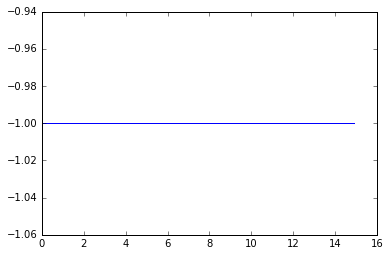

raiz = nan
raiz = nan


In [81]:
# Implementação do Exercício 8.30
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(N):
    T0 = 300      # temperatura [K]
    T  = 1000     # temperatura [K]
    mi = 1.350e-4
    q  = 1.7e-19 
    ni = 6.21e9
    p  = 6.5e6
    return p*q*(0.5*(N+np.sqrt(N**2 + 4*ni**2)))*(mi*(T/T0)**(-2.42)) - 1

def BissecaoRaiz(f, a, b, tol):
    if f(a)*f(b) > 0:
        print("Não existe solução no intervalo dado")
    else:
        xns = (a + b) / 2;
        numIter = 0
        while abs(f(xns)) > tol:
            if False: # modifique para True para ver mais detalhes
                print("iteração: {} | a = {} | b = {} | xns = {} | f(xns) = {}".format(numIter, a, b, xns, f(xns)))
            if f(a)*f(xns) < 0:
                b = xns
            if f(xns)*f(b) < 0:
                a = xns
            xns = (a + b) / 2;
            numIter += 1
        return xns

def ModifiedSecant(f, x, delta, tol):
    i = 2
    xns = x - f(x) * delta / (f(x + delta) - f(x))
    while abs(f(xns)) > tol:
        if False: # modifique para True para ver mais detalhes
            print("iteração: {} | xi = {} | xi-1 = {} | xns = {} | f(xns) = {}".format(i,x,x + delta,xns,f(xns)))
        x = xns
        xns = x - f(x) * delta / (f(x + delta) - f(x))
        i += 1
    return xns
N = np.arange(0.0, 15.0, 0.1)
plt.plot(N, f(N))
plt.show()
print("raiz = {}".format(ModifiedSecant(f,2, 10**(-9), 10**(-6))))
print("raiz = {}".format(ModifiedSecant(f,2, 10**(-9), 10**(-6))))

Usando a bissecção foi preciso 20 iterações para um W = 157.90880250930786
Usando a regulafalsi foi preciso 2584 iterações para um W = 157.90904999843724


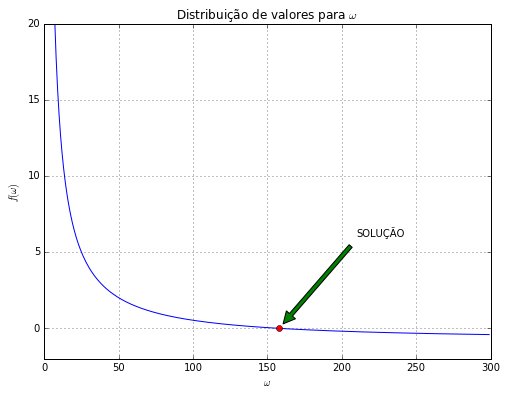

In [85]:
# Implementação do Exercício 8.32
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

np.seterr(divide='ignore', invalid='ignore')

def f(w):
    R  = 225    # Resistência [Ohm] 
    L  = 0.5    # Indutância [H]
    C  = 0.6e-6 # Capacitância [F]
    Z  = 75     # Impedância [Ohm] 
    return Z*np.sqrt(1/R**2 + (w*C - 1/(w*L))**2) - 1

def BissecaoRaiz(f, a, b, tol):
    if f(a)*f(b) > 0:
        print("Não existe solução no intervalo dado")
    else:
        xns = (a + b) / 2;
        numIter = 0
        while abs(f(xns)) > tol:
            if False: # modifique para True para ver mais detalhes
                print("iteração: {} | a = {} | b = {} | xns = {} | f(xns) = {}".format(numIter, a, b, xns, f(xns)))
            if f(a)*f(xns) < 0:
                b = xns
            if f(xns)*f(b) < 0:
                a = xns
            xns = (a + b) / 2;
            numIter += 1
        return numIter, xns
    
def RegulaFalsi(f, a, b, tol):
    if f(a)*f(b) > 0:
        print("Não existe solução no intervalo dado")
        return None
    else:
        xns = (a*f(b) - b*f(a)) / (f(b) - f(a)) # definindo valor inicial de xns
        numIter = 0
        while abs(f(xns)) > tol:
            if False: # modifique para True para ver mais detalhes
                print("iteração: {} | a = {} | b = {} | xns = {} | f(xns) = {}".format(numIter, a, b, xns, f(xns)))
            if f(a)*f(xns) < 0:
                b = xns
            if f(xns)*f(b) < 0:
                a = xns
            xns = (a*f(b) - b*f(a)) / (f(b) - f(a))
            numIter += 1
        return numIter, xns

[i1, root1] = BissecaoRaiz(f,1,1000,10**-6)
[i2, root2] = RegulaFalsi(f,1,1000,10**-6)
print("Usando a bissecção foi preciso {0} iterações para um W = {1}".format(i1, root1))
print("Usando a regulafalsi foi preciso {0} iterações para um W = {1}".format(i2, root2))

# plot do gráfico da função.
rcParams['figure.figsize'] = (8.0, 6.0) # dimensões do gráfico
w = np.arange(0.0, 300.0, 1)
plt.plot(w, f(w), root1, f(root1),'ro') # plot da função junto com o ponto da solução. 
plt.xlabel('$\omega$')
plt.ylabel('$f(\omega)$')
plt.annotate('SOLUÇÃO', xy=(157.90880250930786, 0), xytext=(210, 6),
            arrowprops=dict(facecolor='green', shrink=0.05),
            )
plt.ylim(-2,20)
plt.title('Distribuição de valores para $\omega$')
plt.grid(True)
plt.show()

<!-- Não apague o div -->
<div class="solucao alert alert-success">

A convergência do método para a falsa posição é lenta pois a função é muito CÔNCAVA em toda a execução do método. Primeiramente o ponto a = 1 não varia ao longo da execução o que deixa a convergência mais lenta. Além disso o ponto b inicialmente igual a 1000 varia muito pouco em direção a raiz da função para cada iteração. Para esses casos o método da regula falsi modificado teria melhor aproveitamento.
<!-- Não apague o div -->
</div>

----

# Aparência do Notebook

A célula abaixo contém código cuja única finalidade é modificar a aparência do notebook após a célula ser executada.

In [ ]:
from IPython.core.display import HTML, display

# O arquivo styles.css deve estar na mesma pasta que o notebook
def css_styling():
    try:
        styles = open("./styles.css", "r").read()
        html = "<style>{0}</style>".format(styles)
    except FileNotFoundError:
        html = "<b style=\"font-size: 25px\">Arquivo 'styles.css' não encontrado</b>"
    return HTML(html)
display(css_styling())